<a href="https://colab.research.google.com/github/harrymccc1122/fashionModel/blob/main/fashionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tensorflow


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [ ]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalize the images to the range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape the data to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 [==============================] - 86s 45ms/step - loss: 0.4987 - accuracy: 0.8188 - val_loss: 0.3988 - val_accuracy: 0.8548
Epoch 2/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.3208 - accuracy: 0.8829 - val_loss: 0.3031 - val_accuracy: 0.8907
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.2716 - accuracy: 0.8999 - val_loss: 0.2906 - val_accuracy: 0.8944
Epoch 4/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2432 - accuracy: 0.9107 - val_loss: 0.2843 - val_accuracy: 0.8966
Epoch 5/10
1875/1875 [==============================] - 57s 31ms/step - loss: 0.2185 - accuracy: 0.9194 - val_loss: 0.2584 - val_accuracy: 0.9056
Epoch 6/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.1996 - accuracy: 0.9260 - val_loss: 0.2541 - val_accuracy: 0.9067
Epoch 7/10
1875/1875 [==============================] - 63s 33ms/step - loss: 0.1830 - accuracy: 0.9318 - val_loss: 0.2542 -

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


313/313 - 2s - loss: 0.2700 - accuracy: 0.9107 - 2s/epoch - 8ms/step

Test accuracy: 0.9107000231742859


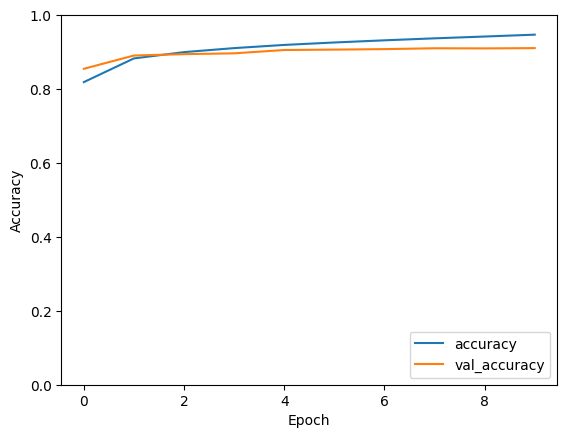

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


Saving custom-nike-dunk-high-by-you-shoes.png to custom-nike-dunk-high-by-you-shoes (2).png
1/1 [==============================] - 0s 20ms/step


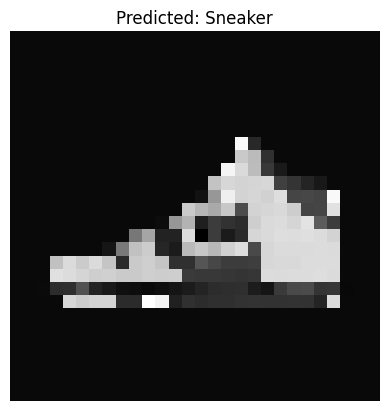

In [20]:
# Function to preprocess the input image
def preprocess_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
    img_array = image.img_to_array(img)
    img_array = 255 - img_array  # Invert the image colors
    img_array = img_array / 255.0  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Function to predict the class of an input image
def predict_image(img_path):
    img_array = preprocess_image(img_path)
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions)
    return predicted_label

# Class labels for Fashion MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Function to display the prediction
def display_prediction():
    uploaded = files.upload()
    for img_path in uploaded.keys():
        predicted_label = predict_image(img_path)
        img = image.load_img(img_path, target_size=(28, 28), color_mode="grayscale")
        img = 255 - np.array(img)  # Invert the image colors for display
        plt.imshow(img, cmap='gray')
        plt.title(f"Predicted: {class_labels[predicted_label]}")
        plt.axis('off')
        plt.show()

# Example usage: Uncomment the line below to run the prediction
display_prediction()